In [9]:
# image classification using SVM

# import the necessary packages
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm


In [10]:
DATADIR = "data/training"

CATEGORIES = ["abraham-lincoln",
                "andrew-jackson",
                "andrew-johnson",
                "barack-obama",
                "benjamin-harrison",
                "calvin-coolidge",
                "chester-a-arthur",
                "donald-trump",
                "dwight-eisenhower",
                "franklin-pierce",
                "franklin-roosevelt",
                "george-h-w-bush",
                "george-w-bush",
                "george-washington",
                "gerald-ford",
                "glover-cleveland",
                "harry-truman",
                "herbert-hoover",
                "james-buchanan",
                "james-earl-carter",
                "james-garfield",
                "james-madison",
                "james-monroe",
                "james-polk",
                "joe-biden",
                "john-adams",
                "john-f-kennedy",
                "john-quincy-adams",
                "john-tyler",
                "lyndon-johnson",
                "martin-van-buren",
                "millard-fillmore",
                "richard-nixon",
                "ronald-reagan",
                "rutherford-hayes",
                "theodore-roosevelt",
                "thomas-jefferson",
                "ulysses-grant",
                "warren-harding",
                "william-henry-harrison",
                "william-howard-taft",
                "william-jefferson-clinton",
                "william-mckinley",
                "woodrow-wilson",
                "zachary-taylor"
                ]
IMG_SIZE=100

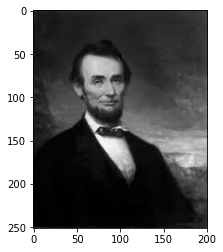

In [11]:
# sample image

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()


100%|██████████| 16/16 [00:00<00:00, 713.45it/s]


In [13]:
print(len(training_data))

709


In [14]:
len_training_data = len(training_data)

For image to be trained we have to convert the image to a array form so,that our model can train on it...!! and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [16]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(len_training_data, -1)

In [17]:
X.shape

(709, 10000)

In [26]:
# flatten the array
X = X/255.0
X[1]

array([[[0.00046136],
        [0.00041522],
        [0.00038447],
        ...,
        [0.00075356],
        [0.00073818],
        [0.00067666]],

       [[0.00046136],
        [0.00041522],
        [0.00036909],
        ...,
        [0.00076894],
        [0.00075356],
        [0.00069204]],

       [[0.00044598],
        [0.00039985],
        [0.00035371],
        ...,
        [0.00076894],
        [0.00076894],
        [0.00069204]],

       ...,

       [[0.00015379],
        [0.00013841],
        [0.00012303],
        ...,
        [0.00103037],
        [0.00096886],
        [0.00087659]],

       [[0.00015379],
        [0.00013841],
        [0.00012303],
        ...,
        [0.00101499],
        [0.0009381 ],
        [0.00084583]],

       [[0.00015379],
        [0.00013841],
        [0.00012303],
        ...,
        [0.00099962],
        [0.00092272],
        [0.00083045]]])

In [21]:
# y should be an array 
y = np.array(y)
y.shape

(709,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [29]:
# applying train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [30]:
# fitting data to the SVM model
model = LinearSVC()
model.fit(X_train, y_train)

# Found array with dim 4. Estimator expected <= 2.
# fixing the dimension of the array



LinearSVC()

In [31]:
# predicting the test data
predictions = model.predict(X_test)


In [32]:
# checking the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.04929577464788732


In [33]:
# fomulating the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.11      0.67      0.19         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.50      0.20      0.29         5
          16       0.20      0.33      0.25         3
          17       0.00    

/home/retech/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/retech/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/retech/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/retech/anaconda3/lib/python3.8/si